In [ ]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import precision_score, accuracy_score

In [ ]:
#Loading Dataset

url='https://github.com/dhxrni/stockpr/blob/main/AXISBANK.csv'
df=pd.read_csv(url)

In [ ]:
# df.head() {from top}
#by deafault 5 values will be shown

df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,03-01-2000,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,04-01-2000,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387280e+11,NaN,NaN,NaN
2,05-01-2000,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,06-01-2000,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,07-01-2000,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [ ]:
df.shape

(5306, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5306 non-null   datetime64[ns]
 1   Symbol              5306 non-null   object        
 2   Series              5306 non-null   object        
 3   Prev Close          5306 non-null   float64       
 4   Open                5306 non-null   float64       
 5   High                5306 non-null   float64       
 6   Low                 5306 non-null   float64       
 7   Last                5306 non-null   float64       
 8   Close               5306 non-null   float64       
 9   VWAP                5306 non-null   float64       
 10  Volume              5306 non-null   int64         
 11  Turnover            5306 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  4797 non-n

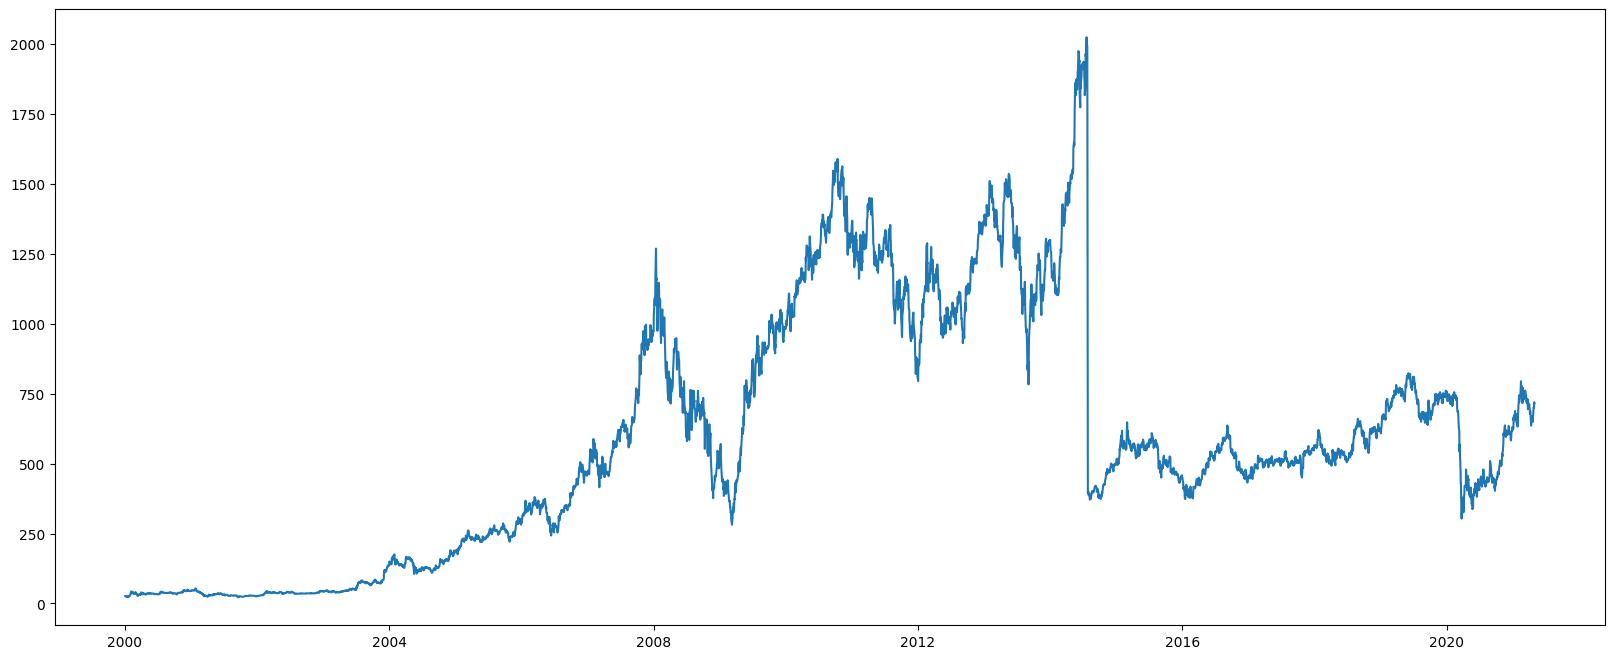

In [ ]:
#Ploting the real Close value of the stock
df["Date"]=pd.to_datetime(df.Date,format="%d-%m-%Y")
df.index=df['Date']


scaler=MinMaxScaler(feature_range=(0,1))

plt.figure(figsize=(20,8))
plt.plot(df["Close"],label='Close Price history')



data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]


new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

In [ ]:
#---> Spliting Data for Training & Testing
final_dataset=new_dataset.values

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))


In [ ]:
#---> Model Training
"""
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
"""

# Initialising the RNN
lstm_model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
lstm_model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train_data.shape[1],1)))
lstm_model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
lstm_model.add(LSTM(units = 50))
lstm_model.add(Dropout(0.2))

In [ ]:
#Validation Data for model
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

In [ ]:
# Adding the output layer
lstm_model.add(Dense(units = 1))

# Compiling the RNN
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
lstm_model.fit(x_train_data,y_train_data, epochs = 50, batch_size = 32)

Epoch 1/50
29/29 [==============================] - 16s 268ms/step - loss: 5.6635e-05
Epoch 2/50
29/29 [==============================] - 7s 242ms/step - loss: 2.0148e-05
Epoch 3/50
29/29 [==============================] - 8s 291ms/step - loss: 1.2054e-05
Epoch 4/50
29/29 [==============================] - 7s 225ms/step - loss: 9.3471e-06
Epoch 5/50
29/29 [==============================] - 5s 162ms/step - loss: 8.5710e-06
Epoch 6/50
29/29 [==============================] - 3s 117ms/step - loss: 8.6750e-06
Epoch 7/50
29/29 [==============================] - 3s 120ms/step - loss: 8.7000e-06
Epoch 8/50
29/29 [==============================] - 4s 133ms/step - loss: 7.8092e-06
Epoch 9/50
29/29 [==============================] - 4s 135ms/step - loss: 8.6584e-06
Epoch 10/50
29/29 [==============================] - 3s 113ms/step - loss: 9.6003e-06
Epoch 11/50
29/29 [==============================] - 3s 116ms/step - loss: 6.5306e-06
Epoch 12/50
29/29 [==============================] - 5s 159ms/

In [ ]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)


X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)


135/135 [==============================] - 6s 32ms/step


In [ ]:
#---> Saving Trained Model
lstm_model.save("saved_lstm_model.h5")

In [ ]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price

<ipython-input-14-abc50887ccd8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


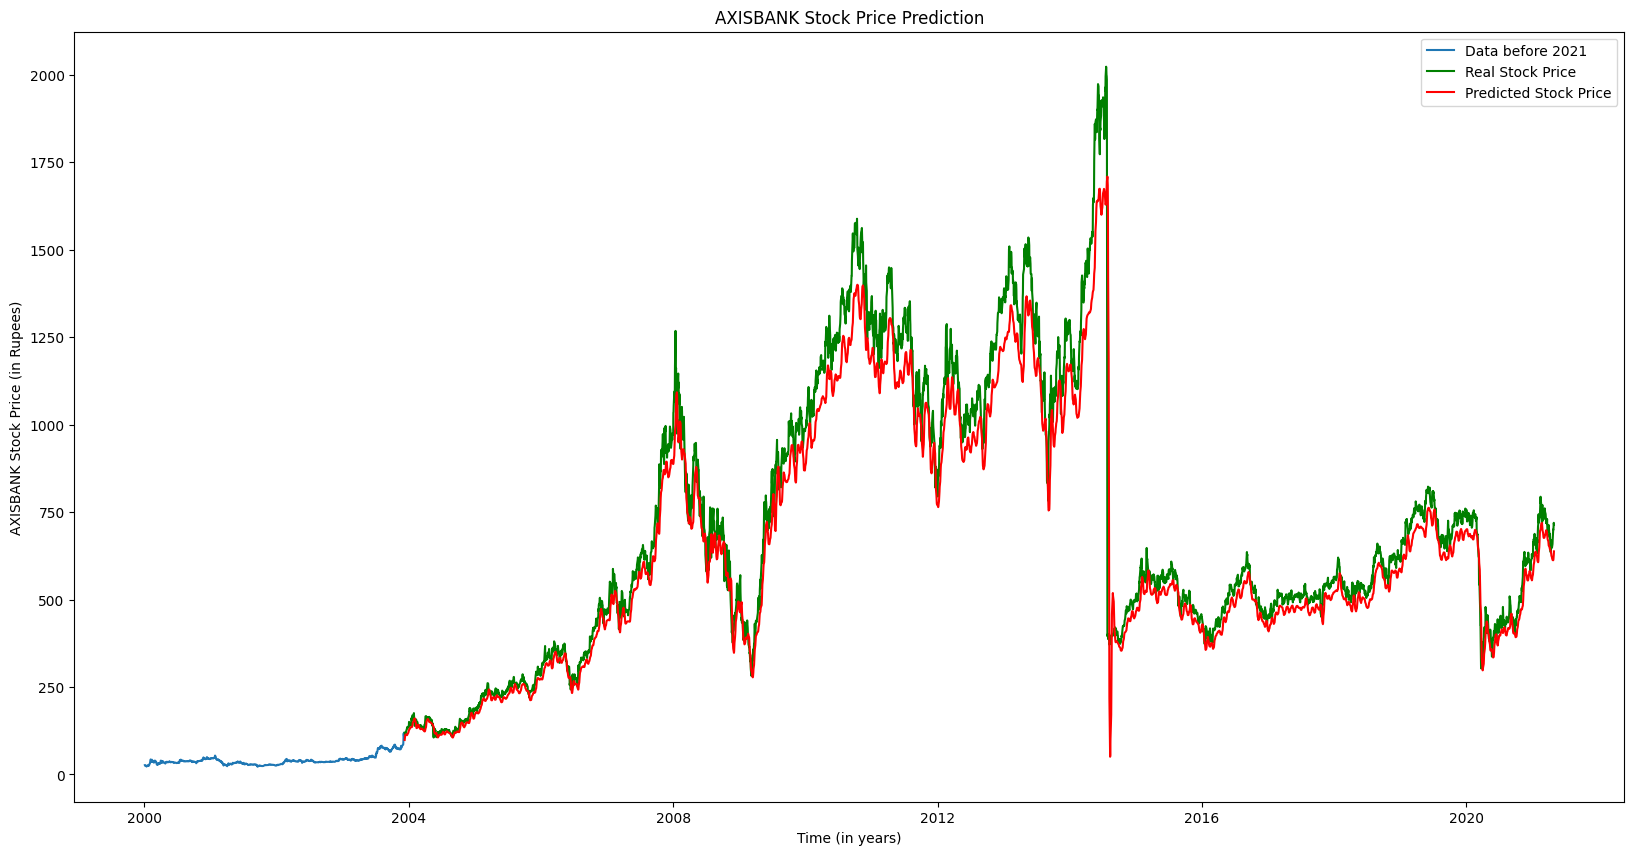

In [ ]:
#--->  Visualizing the predicted stock costs with actual stock costs ( Closing price of Stocks )
plt.figure(figsize=(20,10))
plt.title('AXISBANK Stock Price Prediction')
plt.xlabel('Time (in years)')
plt.ylabel('AXISBANK Stock Price (in Rupees)')
plt.plot(train_data["Close"], label = 'Data before 2021')
plt.plot(valid_data['Close'],color = 'green', label = 'Real Stock Price')
plt.plot(valid_data["Predictions"],color = 'red', label = 'Predicted Stock Price')

plt.legend()
plt.show()